<a href="https://colab.research.google.com/github/JiwonHae94/Tensorflow-For-Beginners/blob/main/TensorFlow_BasicClassification_Cloth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
# import dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_img.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_img.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

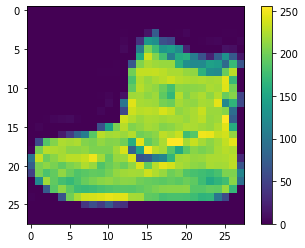

In [13]:
# data preprocessing
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# normalize images
train_img = train_img / 255.0
test_img = test_img / 255.0

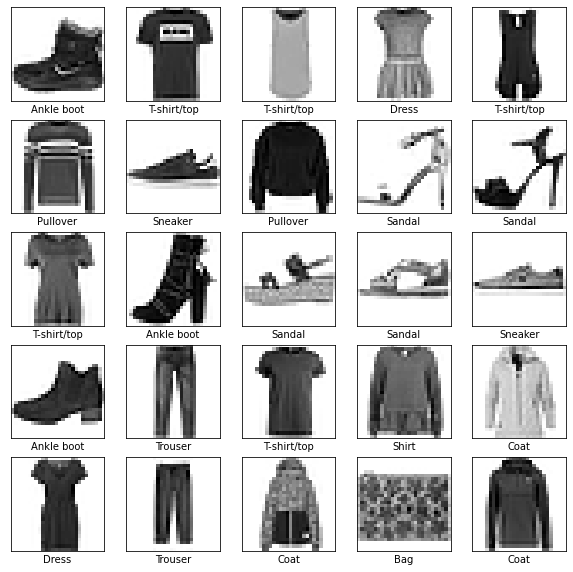

In [17]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+ 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap = plt.cm.binary)
  plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [19]:
model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dense(10)])

In [20]:
# loss function - measure how accurate the model is during training
# optimizer - model is bupdated on the data it sees and its loss function
# metric - monitor training and testing steps

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])


In [21]:
model.fit(train_img, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4988 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [22]:
test_loss , test_acc = model.evaluate(test_img, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3346 - accuracy: 0.8843 - 485ms/epoch - 2ms/step

Test accuracy: 0.8842999935150146


In [23]:
# make prediction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_img)

In [27]:
predictions[0]

array([2.6422728e-07, 1.7295839e-09, 2.3529991e-09, 3.5330785e-09,
       3.4456424e-10, 3.5714870e-04, 1.0253464e-06, 1.1220789e-01,
       1.5129412e-09, 8.8743371e-01], dtype=float32)

In [31]:
# index of the highest probability
np.argmax(predictions[0])

9

In [42]:
def plot_img(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                100*np.max(predictions_array),
                                class_labels[true_label]),
                                color=color)

In [47]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

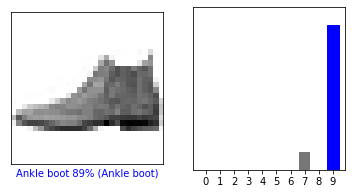

In [48]:
# verify predictions
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_img(i, predictions[i], test_labels, test_img)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

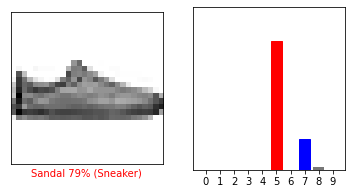

In [51]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

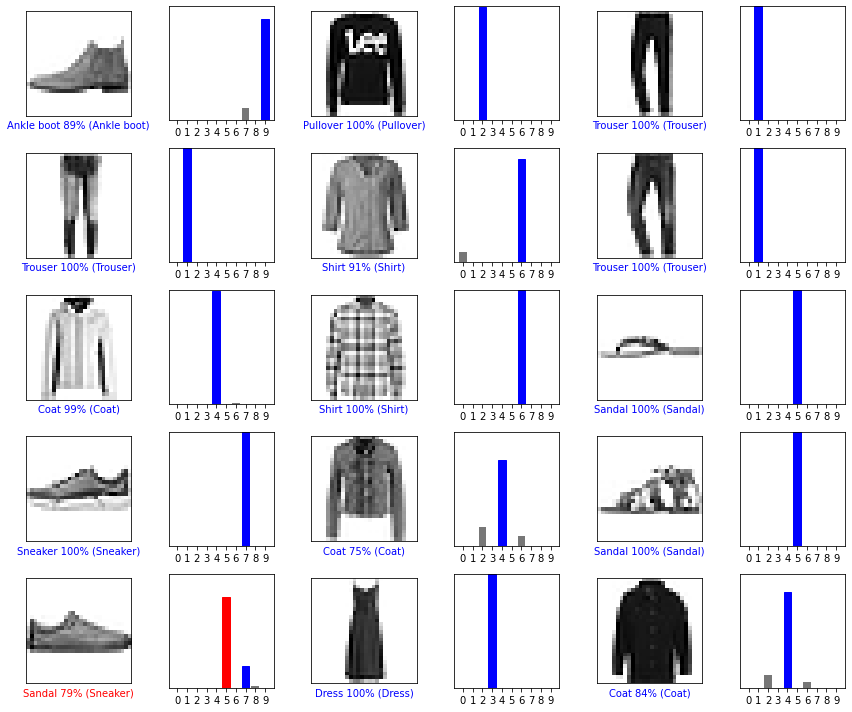

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
rows = 5
cols = 3
num_imgs = rows * cols
plt.figure(figsize = (2 * 2 * cols, 2 * rows))
for i in range(num_imgs):
  plt.subplot(rows, 2 * cols, 2 * i + 1)
  plot_img(i, predictions[i], test_labels, test_img)
  plt.subplot(rows, 2 * cols, 2 * i + 2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [56]:
img = test_img[1]
print(img.shape)

(28, 28)


In [57]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [59]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.5443886e-05 3.1348348e-12 9.9736434e-01 1.5142720e-11 2.1169600e-03
  3.9024703e-10 4.9328047e-04 2.0868086e-12 1.4366569e-11 3.9339738e-12]]


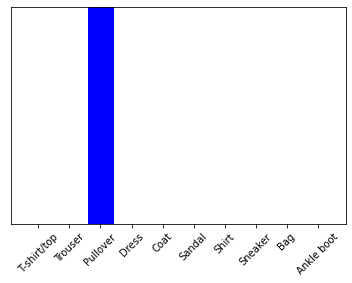

In [61]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_labels, rotation=45)
plt.show()

In [62]:
np.argmax(predictions_single[0])

2